In [1]:
import pandas as pd
import act
import glob
import xarray as xr
import numpy as np

import altair as alt
alt.data_transformers.enable('json')

from sublimpy import tidy
import datetime as dt

In [ ]:
import pandas as pd
import act
import glob
import xarray as xr
import numpy as np

import altair as alt
alt.data_transformers.enable('json')

from sublimpy import tidy
import datetime as dt

# User inputs

In [2]:
start_date = '20221130'
end_date = '20230509'

start_date_lastseason = '20211101'
end_date_lastseason = '20220601'

tidy_dataset_fn = f"../sos/tidy_df_30Min_{start_date}_{end_date}_noplanar_fit.parquet"
tidy_daily_dataset_output_fn = f"tidy_df_daily_{start_date}_{end_date}_noplanar_fit.parquet"

# Load data

## SoS

This dataset is created by the `create_turbulence_dataset.ipynb` notebook

In [3]:
try:
    tidy_df_30Min = pd.read_parquet(
        tidy_dataset_fn
    )
except FileNotFoundError:
    print("No file such file exists for these dates.")
tidy_df_30Min['time'] = pd.to_datetime(tidy_df_30Min['time'])

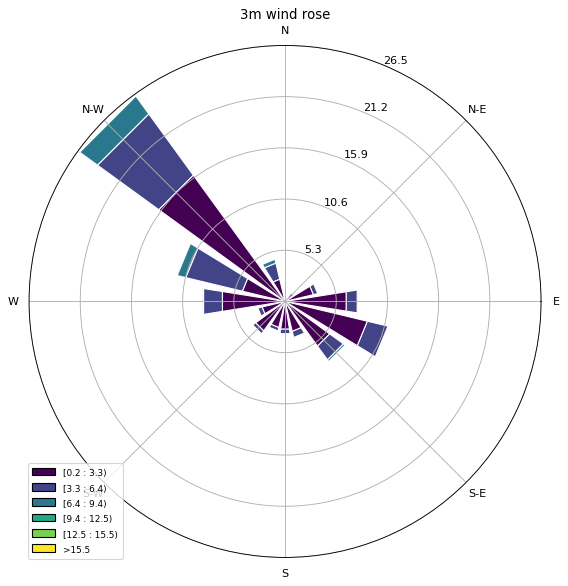

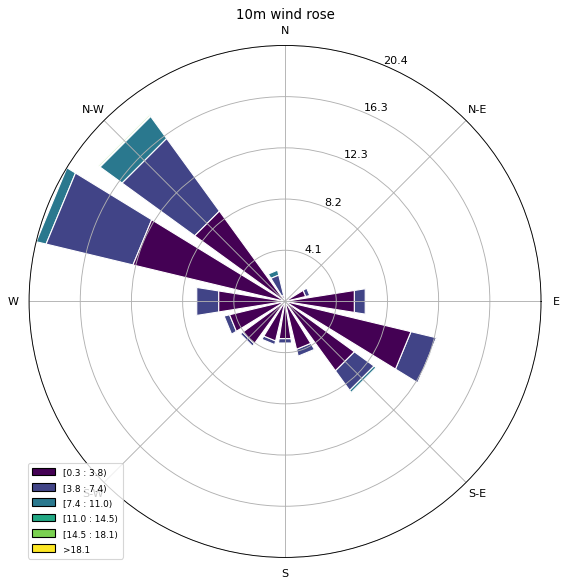

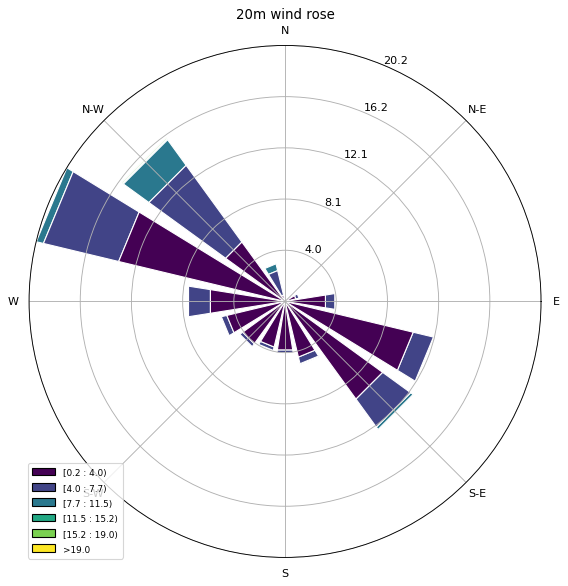

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
# Uncomment the following line in case you are missing those packages
# !pip install windrose openpyxl
from windrose import WindroseAxes

src = tidy_df_30Min[
    tidy_df_30Min.variable.isin(['spd_3m_c', 'dir_3m_c'])
].pivot_table(values = 'value', index='time', columns=['measurement']).reset_index()


ax = WindroseAxes.from_ax()
ax.bar(src['wind direction'], src['wind speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("3m wind rose")
plt.savefig("3m_wind_rose.png")

src = tidy_df_30Min[
    tidy_df_30Min.variable.isin(['spd_10m_c', 'dir_10m_c'])
].pivot_table(values = 'value', index='time', columns=['measurement']).reset_index()


ax = WindroseAxes.from_ax()
ax.bar(src['wind direction'], src['wind speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("10m wind rose")
plt.savefig("10m_wind_rose.png")

src = tidy_df_30Min[
    tidy_df_30Min.variable.isin(['spd_20m_c', 'dir_20m_c'])
].pivot_table(values = 'value', index='time', columns=['measurement']).reset_index()


ax = WindroseAxes.from_ax()
ax.bar(src['wind direction'], src['wind speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("20m wind rose")
plt.savefig("20m_wind_rose.png")

In [19]:
src = tidy_df_30Min[tidy_df_30Min.variable.isin(['spd_3m_c', 'spd_5m_c', 'spd_10m_c', 'spd_20m_c', 'SF_avg_1m_ue', 'SF_avg_2m_ue'])]

In [20]:
src = src[src.time < "2022-12-24"]
src = src[src.time > "2022-12-20"]

In [25]:
xr.open_dataset("/data2/elilouis/sublimationofsnow/sosnoqc/isfs_20221030.nc")['SF_avg_1m_ue']

<xarray.DataArray 'SF_avg_1m_ue' (time: 288)>
[288 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2022-10-30T00:02:30 ... 2022-10-30T23:57:30
Attributes:
    long_name:   Average snow flux
    short_name:  SF_avg.1m.ue
    units:       g/m^2/s

In [33]:
src.groupby("variable")['value'].max()

variable
SF_avg_1m_ue    49.672500
SF_avg_2m_ue     8.583333
spd_10m_c       18.110257
spd_20m_c       18.982394
spd_3m_c        15.509706
spd_5m_c        16.872310
Name: value, dtype: float64

In [31]:
(alt.Chart(src).transform_filter(
    alt.datum.measurement == 'wind speed'
).mark_line().encode(
    alt.X("time:T"),
    alt.Y("value:Q", title = 'm/s'),
    alt.Color("variable:N"),
    alt.Row("measurement:N")
).properties(width=500, height = 150) & alt.Chart(src).transform_filter(
    alt.datum.measurement == 'snow flux'
).mark_line().encode(
    alt.X("time:T"),
    alt.Y("value:Q", title = 'g/m^2/s'),
    alt.Color("variable:N"),
    alt.Row("measurement:N")
).properties(width=500, height = 150)).resolve_scale(color='independent')

alt.VConcatChart(...)

In [ ]:
a
src

## SAIL ECOR

In [4]:
# username = os.getenv("ARM_USERNAME")
# token = os.getenv("ARM_TOKEN")
# ecor_gothic = 'guc/30ecorM1.b1'
# ecor_kp = 'guc30ecorS3.b1'
# output_dir = '/data2/elilouis/sublimationofsnow/'

# kp_sail_ecor_download_dir = os.path.join(output_dir, ecor_kp)
# gothic_sail_ecor_download_dir = os.path.join(output_dir, ecor_gothic)

In [5]:
# act.discovery.download_data(
#     username,    token,    ecor_gothic,    
#     start_date_lastseason,
#     end_date,
#     output = os.path.join(output_dir, ecor_gothic)
# )
# act.discovery.download_data(
#     username,    token,    ecor_kp,    
#     start_date_lastseason,
#     end_date,
#     output = os.path.join(output_dir, ecor_kp)
# )

In [6]:
# ecor_gothic_ds = act.io.armfiles.read_netcdf(
#     glob.glob(os.path.join(output_dir, ecor_gothic, '*.cdf'))
# )
# ecor_gothic_ds_thisseason = ecor_gothic_ds.sel(time = slice(start_date, end_date))
# ecor_gothic_ds_lastseason = ecor_gothic_ds.sel(time = slice(start_date_lastseason, end_date_lastseason))
# del ecor_gothic_ds

In [7]:
# ecor_kps_ds = act.io.armfiles.read_netcdf(
#     glob.glob(os.path.join(output_dir, ecor_kp, '*.cdf'))
# )
# ecor_kps_ds_thisseason = ecor_kps_ds.sel(time = slice(start_date, end_date))
# ecor_kps_ds_lastseason = ecor_kps_ds.sel(time = slice(start_date_lastseason, end_date_lastseason))
# del ecor_kps_ds

# Cache SAIL data

In [8]:
# ecor_gothic_ds_thisseason.to_netcdf('cumulative_sublimation-ecor_gothic_ds_thisseason.cdf')
# ecor_kps_ds_thisseason.to_netcdf('cumulative_sublimation-ecor_kps_ds_thisseason.cdf')
# ecor_gothic_ds_lastseason.to_netcdf('cumulative_sublimation-ecor_gothic_ds_lastseason.cdf')
# ecor_kps_ds_lastseason.to_netcdf('cumulative_sublimation-ecor_kps_ds_lastseason.cdf')

In [9]:
# ecor_gothic_ds_thisseason = xr.open_dataset('cumulative_sublimation-ecor_gothic_ds_thisseason.cdf')
# ecor_kps_ds_thisseason = xr.open_dataset('cumulative_sublimation-ecor_kps_ds_thisseason.cdf')
# ecor_gothic_ds_lastseason = xr.open_dataset('cumulative_sublimation-ecor_gothic_ds_lastseason.cdf')
# ecor_kps_ds_lastseason = xr.open_dataset('cumulative_sublimation-ecor_kps_ds_lastseason.cdf')

# Examine Eddy Covariance QC flags at ECOR towers

In [10]:

# import matplotlib.pyplot as plt
# fig, axes = plt.subplots(2,1, figsize=(15,2*5/3))
# ecor_kps_ds_lastseason['lv_e'].plot(ax = axes[0])
# ecor_kps_ds_lastseason['qc_lv_e'].plot.scatter(ax = axes[1], color='k', s=1, marker='x')
# for ax in axes:
#     ax.set_ylabel(ax.get_ylabel(), rotation=0)
#     ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.show()

# fig, axes = plt.subplots(2,1, figsize=(15,2*5/3))
# ecor_kps_ds_thisseason['lv_e'].plot(ax = axes[0])
# ecor_kps_ds_thisseason['qc_lv_e'].plot.scatter(ax = axes[1], color='k', s=1, marker='x')
# for ax in axes:
#     ax.set_ylabel(ax.get_ylabel(), rotation=0)
#     ax.yaxis.set_label_coords(-0.1, 0.5)
# plt.show()

# Remove LH flux outliers

In [11]:
def get_outlier_threshold(values, iqr_multiple = 100):
    q1, q3 = np.percentile(sorted(values), [25, 75])

    # compute IRQ
    iqr = q3 - q1

    # find lower and upper bounds
    lower_bound = q1 - (iqr_multiple * iqr)
    upper_bound = q3 + (iqr_multiple * iqr)
    return lower_bound, upper_bound

## SoS

In [12]:
for variable in [
    'w_h2o__3m_uw',
    'w_h2o__3m_ue',
    'w_h2o__3m_c',
    'w_h2o__3m_d'
]:
    filter = tidy_df_30Min.variable == variable
    lower_bound, upper_bound = get_outlier_threshold(
        tidy_df_30Min.loc[filter, 'value'].dropna().values
    )
    print((lower_bound, upper_bound))
    tidy_df_30Min.loc[filter, 'value'] = tidy_df_30Min.loc[filter, 'value'].where(
            (tidy_df_30Min.loc[filter, 'value'] > lower_bound) & 
            (tidy_df_30Min.loc[filter, 'value'] < upper_bound)
        )

(-0.39412668454194016, 0.397650318807185)
(-0.4041484573857209, 0.40781173511519836)
(-0.4011447868879259, 0.40468159659394587)
(-0.40724045862589264, 0.4108625949584166)


## ECOR

In [13]:
# lower_bound, upper_bound = get_outlier_threshold(
#     ecor_kps_ds_thisseason['cvar_wq'].dropna(dim='time').values
# )
# print((lower_bound, upper_bound))
# ecor_kps_ds_thisseason['cvar_wq'] = ecor_kps_ds_thisseason['cvar_wq'].where(
#         (ecor_kps_ds_thisseason['cvar_wq'] > lower_bound) & 
#         (ecor_kps_ds_thisseason['cvar_wq'] < upper_bound)
#     )

# lower_bound, upper_bound = get_outlier_threshold(
#     ecor_gothic_ds_thisseason['cvar_wq'].dropna(dim='time').values
# )
# print((lower_bound, upper_bound))
# ecor_gothic_ds_thisseason['cvar_wq'] = ecor_gothic_ds_thisseason['cvar_wq'].where(
#         (ecor_gothic_ds_thisseason['cvar_wq'] > lower_bound) & 
#         (ecor_gothic_ds_thisseason['cvar_wq'] < upper_bound)
#     )


# lower_bound, upper_bound = get_outlier_threshold(
#     ecor_kps_ds_lastseason['cvar_wq'].dropna(dim='time').values
# )
# print((lower_bound, upper_bound))
# ecor_kps_ds_lastseason['cvar_wq'] = ecor_kps_ds_lastseason['cvar_wq'].where(
#         (ecor_kps_ds_lastseason['cvar_wq'] > lower_bound) & 
#         (ecor_kps_ds_lastseason['cvar_wq'] < upper_bound)
#     )

# lower_bound, upper_bound = get_outlier_threshold(
#     ecor_gothic_ds_lastseason['cvar_wq'].dropna(dim='time').values
# )
# print((lower_bound, upper_bound))
# ecor_gothic_ds_lastseason['cvar_wq'] = ecor_gothic_ds_lastseason['cvar_wq'].where(
#         (ecor_gothic_ds_lastseason['cvar_wq'] > lower_bound) & 
#         (ecor_gothic_ds_lastseason['cvar_wq'] < upper_bound)
#     )

# Calculate cumulative sublimation with daily mean latent heat fluxes

## SoS

### Create daily dataset

In [14]:
tidy_df_30Min['date'] = tidy_df_30Min['time'].dt.date

tidy_df_daily = tidy_df_30Min.drop(columns=['time']).groupby(
    ['date', 'tower', 'height', 'measurement', 'variable']
).mean().reset_index()

tidy_df_daily['time'] = pd.to_datetime(tidy_df_daily['date'])

tidy_df_daily = tidy_df_daily.drop(columns=['date'])

# remove days with only partial data
tidy_df_daily = tidy_df_daily[
    tidy_df_daily.time > tidy_df_daily.time.min()
][
    tidy_df_daily.time < tidy_df_daily.time.max()
]

/tmp/ipykernel_69349/400594300.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tidy_df_daily = tidy_df_daily[


### Calculate cumulative sublimation

In [15]:
for variable in [
    'w_h2o__3m_uw',
    'w_h2o__3m_ue',
    'w_h2o__3m_c',
    'w_h2o__3m_d'
]:
    tidy_df_daily = tidy.tidy_df_add_variable(
        tidy_df_daily,
        np.cumsum(tidy_df_daily.query(f"variable == '{variable}'")['value']*60*60*24).values*1000/(1e6),
        "Cumulative sublimation (mm)",
        "Cumulative sublimation (mm)",
        int(variable.split('_')[-2].split('m')[0]),
        variable.split('_')[-1]
    )

In [57]:
for variable in [
    'w_h2o__3m_uw',
    'w_h2o__3m_ue',
    'w_h2o__3m_c',
    'w_h2o__3m_d'
]:
    tidy_df_30Min = tidy.tidy_df_add_variable(
        tidy_df_30Min,
        np.cumsum(tidy_df_30Min.query(f"variable == '{variable}'")['value']*60*30).values*1000/(1e6),
        "Cumulative sublimation (mm)",
        "Cumulative sublimation (mm)",
        int(variable.split('_')[-2].split('m')[0]),
        variable.split('_')[-1]
    )

In [75]:

tidy_df_30Min_calm = tidy_df_30Min[tidy_df_30Min.time.isin(
    tidy_df_30Min.query("variable == 'SF_avg_1m_ue'").query("value == 0").time.unique()
)]
tidy_df_30Min_blowing = tidy_df_30Min[tidy_df_30Min.time.isin(
    tidy_df_30Min.query("variable == 'SF_avg_1m_ue'").query("value > 0").time.unique()
)]

### Save daily data

In [16]:
tidy_df_daily.to_parquet(tidy_daily_dataset_output_fn)

## ECOR

### Convert from mmol/m^3 to g/m^2

In [17]:

# convert from mmol/m^3 to g/m^2
# 18.02 grams/mol
# conversion: (original / 1000) * 18.02
ecor_kps_df_thisseason = (ecor_kps_ds_thisseason['cvar_wq']*18.02/1000).to_dataframe().reset_index()
ecor_gothic_df_thisseason = (ecor_gothic_ds_thisseason['cvar_wq']*18.02/1000).to_dataframe().reset_index()

ecor_kps_df_lastseason = (ecor_kps_ds_lastseason['cvar_wq']*18.02/1000).to_dataframe().reset_index()
ecor_gothic_df_lastseason = (ecor_gothic_ds_lastseason['cvar_wq']*18.02/1000).to_dataframe().reset_index()

NameError: name 'ecor_kps_ds_thisseason' is not defined

### Remove ECOR data to match time/extent of SoS data from 2022-23

In [18]:
ecor_kps_df_thisseason = ecor_kps_df_thisseason[ecor_kps_df_thisseason['time'] > dt.datetime.strptime(start_date, '%Y%m%d')]
ecor_kps_df_thisseason = ecor_kps_df_thisseason[ecor_kps_df_thisseason['time'] < dt.datetime.strptime(end_date, '%Y%m%d')]

ecor_gothic_df_thisseason = ecor_gothic_df_thisseason[ecor_gothic_df_thisseason['time'] > dt.datetime.strptime(start_date, '%Y%m%d')]
ecor_gothic_df_thisseason = ecor_gothic_df_thisseason[ecor_gothic_df_thisseason['time'] < dt.datetime.strptime(end_date, '%Y%m%d')]

ecor_kps_df_lastseason = ecor_kps_df_lastseason[ecor_kps_df_lastseason['time'] > dt.datetime.strptime(start_date, '%Y%m%d').replace(year=2021)]
ecor_kps_df_lastseason = ecor_kps_df_lastseason[ecor_kps_df_lastseason['time'] < dt.datetime.strptime(end_date, '%Y%m%d').replace(year=2022)]

ecor_gothic_df_lastseason = ecor_gothic_df_lastseason[ecor_gothic_df_lastseason['time'] > dt.datetime.strptime(start_date, '%Y%m%d').replace(year=2021)]
ecor_gothic_df_lastseason = ecor_gothic_df_lastseason[ecor_gothic_df_lastseason['time'] < dt.datetime.strptime(end_date, '%Y%m%d').replace(year=2022)]

NameError: name 'ecor_kps_df_thisseason' is not defined

### Create daily datasets

In [19]:
ecor_gothic_df_thisseason_daily = ecor_gothic_df_thisseason.set_index('time').resample('1440Min').mean().reset_index()
ecor_kps_df_thisseason_daily = ecor_kps_df_thisseason.set_index('time').resample('1440Min').mean().reset_index()
ecor_gothic_df_lastseason_daily = ecor_gothic_df_lastseason.set_index('time').resample('1440Min').mean().reset_index()
ecor_kps_df_lastseason_daily = ecor_kps_df_lastseason.set_index('time').resample('1440Min').mean().reset_index()

NameError: name 'ecor_gothic_df_thisseason' is not defined

### Calculate cumulative sublimation

In [20]:
ecor_gothic_df_thisseason_daily['Cumulative sublimation (mm)'] = np.cumsum(
    (ecor_gothic_df_thisseason_daily['cvar_wq'].fillna(0)*60*60*24).values*1000/(1e6)
)
ecor_kps_df_thisseason_daily['Cumulative sublimation (mm)'] = np.cumsum(
    (ecor_kps_df_thisseason_daily['cvar_wq'].fillna(0)*60*60*24).values*1000/(1e6)
)

ecor_gothic_df_lastseason_daily['Cumulative sublimation (mm)'] = np.cumsum(
    (ecor_gothic_df_lastseason_daily['cvar_wq'].fillna(0)*60*60*24).values*1000/(1e6)
)
ecor_kps_df_lastseason_daily['Cumulative sublimation (mm)'] = np.cumsum(
    (ecor_kps_df_lastseason_daily['cvar_wq'].fillna(0)*60*60*24).values*1000/(1e6)
)

NameError: name 'ecor_gothic_df_thisseason_daily' is not defined

# Compare multiple cumulative sublimation estimates

In [79]:
sos_swe_chart_src = tidy_df_daily.query(
        "measurement == 'SWE'"
    ).dropna()

sos_swe_chart = alt.Chart(
    sos_swe_chart_src    
).mark_line(opacity=0.6, strokeDash=[4,2]).encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='Snow Pillow SWE (mm)').axis(offset=50),
    alt.Color(
        'tower:N',
        legend=alt.Legend(symbolOpacity=1)
    )
)

In [64]:
alt.Chart(
     tidy_df_30Min.query(
        "measurement == 'Cumulative sublimation (mm)'"
    )
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='Cumulative sublimation (mm)').scale(domain=[0,50], clamp=True),
    # alt.Color("tower:N")
).properties(width=800, height = 200)

alt.Chart(...)

In [22]:
sos_sublimation_src = tidy_df_daily.query(
        "measurement == 'Cumulative sublimation (mm)'"
    ).query(
        "height == 3"
    ).dropna()

sos_sublimation_chart = alt.Chart(
    sos_sublimation_src    
).mark_line().encode(
    alt.X('time:T'),
    alt.Y("value:Q", title='Cumulative sublimation (mm)').scale(domain=[0,50], clamp=True),
    alt.Color("tower:N")
)

## Artificially adjust timestamps of ECOR 2021-22 so that they overlap with the 22-23 seasons

In [23]:
ecor_kps_df_lastseason_daily['time'] = ecor_kps_df_lastseason_daily['time'].apply(
    lambda dt: (dt.replace(year = dt.year + 1))
)
ecor_gothic_df_lastseason_daily['time'] = ecor_gothic_df_lastseason_daily['time'].apply(
    lambda dt: (dt.replace(year = dt.year + 1))
)

NameError: name 'ecor_kps_df_lastseason_daily' is not defined

In [24]:
src = pd.concat([
    ecor_kps_df_thisseason_daily.assign(measurement = 'KPS ECOR', season='2022-23'),
    ecor_gothic_df_thisseason_daily.assign(measurement = 'Gothic ECOR', season='2022-23'),
    ecor_kps_df_lastseason_daily.assign(measurement = 'KPS ECOR', season='2021-22'),
    ecor_gothic_df_lastseason_daily.assign(measurement = 'Gothic ECOR', season='2021-22'),
])

ecor_sublimation_chart = alt.Chart(src).mark_line(
    strokeDash=[20,8]
).encode(
    alt.X("time:T"),
    alt.Y("Cumulative sublimation (mm)"),
    alt.Color("measurement:N"),
    alt.StrokeDash("season:O")
)

ecor_sublimation_chart

NameError: name 'ecor_kps_df_thisseason_daily' is not defined

In [25]:
sos_sublimation_df = tidy_df_daily.query(
        "measurement == 'Cumulative sublimation (mm)'"
    ).query(
        "height  == 3"
    )
sos_sublimation_df['EC system'] = sos_sublimation_df.apply(lambda row: f"tower {row.tower}, {int(row.height)}m", axis=1)



ecor_sublimation_df = pd.concat([
    ecor_kps_df_thisseason_daily.assign(measurement = 'KPS ECOR, 22-23'),
    ecor_gothic_df_thisseason_daily.assign(measurement = 'Gothic ECOR, 22-23'),
    ecor_kps_df_lastseason_daily.assign(measurement = 'KPS ECOR, 21-22'),
    ecor_gothic_df_lastseason_daily.assign(measurement = 'Gothic ECOR, 21-22')
])

NameError: name 'ecor_kps_df_thisseason_daily' is not defined

In [ ]:
cumulative_sublimation_df = pd.concat([
    ecor_sublimation_df[
        ['time', 'measurement', 'Cumulative sublimation (mm)']
    ].rename(
        columns = {'Cumulative sublimation (mm)': 'value'}
    ),
    sos_sublimation_df[['time', 'EC system', 'value']].rename(columns = {'EC system': 'measurement'})
])

In [26]:
cum_sublimation_chart = alt.Chart(cumulative_sublimation_df).mark_line().encode(
    alt.X('time:T').title('time (local)'),
    alt.Y('value:Q').scale(domain=[0,50], clamp=True).title("Cumulative sublimation (mm)"), 
    alt.Color("measurement:N")
)

NameError: name 'cumulative_sublimation_df' is not defined

In [27]:
cum_sublimation_chart

NameError: name 'cum_sublimation_chart' is not defined

# Make additional calculations

## Calculate daily sublimation rates

In [28]:
local_src = tidy_df_daily.query("variable == 'w_h2o__3m_c'")
local_src = local_src.iloc[1:-1] # drop days with partial measurements
local_src['value'] = local_src['value']*60*60*24*0.001 # calculate daily sublimation

$$ \frac{g}{m^2 * s} * \frac{1800 s}{measurement} * \frac{.001 kg}{g} * \frac{1 m^3}{1000 kg} * \frac{1000 mm }{m}$$

$$ \frac{m}{s} * 1800 * .001 * (1 / 1000) * (1000)$$

In [29]:
daily_sublimation_chart = alt.Chart(local_src).mark_bar(opacity=0.2).encode(
    alt.X("time:T").title('time (local)'),
    alt.Y("value:Q").title("Daily sublimation (mm)"), 
)

## Calculate Net Radiation

In [30]:
net_radiation_values = (
    (
        tidy_df_daily.query("variable == 'Rsw_in_9m_d'")['value'].values
        +
        tidy_df_daily.query("variable == 'Rlw_in_9m_d'")['value'].values
    ) - (
        tidy_df_daily.query("variable == 'Rsw_out_9m_d'")['value'].values
        +
        tidy_df_daily.query("variable == 'Rlw_out_9m_d'")['value'].values
    )
)



tidy_df_daily = tidy.tidy_df_add_variable(
    tidy_df_daily,
    net_radiation_values,
    'Rnet_9m_d',
    'net radiation',
    9,
    'd'
)


To Do/Add:

* water flux into soil
* SWE from snow pillows + overlaid snow pit data

In [31]:
daily_sublimation_chart = alt.Chart(local_src).mark_bar(opacity=0.2).encode(
    alt.X("time:T", title=None).axis(labels=False, ticks=False),
    alt.Y("value:Q").title("Daily sublimation (mm)"), 
)

temp_chart = alt.Chart(
    tidy_df_daily.query("variable == 'T_3m_c'")
).mark_line().encode(
    alt.X("time:T").title('time (local)'),
    alt.Y("value:Q").title('Mean daily temperature (˚C)')
)

surf_temp_chart = alt.Chart(
    tidy_df_daily.query("variable == 'Tsurf_c'")
).mark_line().encode(
    alt.X("time:T").title('time (local)').axis(labels=False, ticks=False),
    alt.Y("value:Q").title('Mean daily surface temperature (˚C)')
)

surf_and_air_temp_chart = alt.Chart(
    tidy_df_daily[tidy_df_daily.variable.isin(['T_3m_c', 'Tsurf_c'])]
).mark_line().encode(
    alt.X("time:T", title=None).axis(labels=False, ticks=False),
    alt.Y("value:Q").title("Temperature (˚C)"),
    alt.StrokeDash("measurement:N")
)

spd_chart = alt.Chart(
    tidy_df_daily.query("variable == 'spd_3m_c'")
).mark_line().encode(
    alt.X("time:T").title('time (local)'),
    alt.Y("value:Q").title('Mean daily wind speed (m/s)')
)

netrad_chart = alt.Chart(
    tidy_df_daily.query("variable == 'Rnet_9m_d'")
).mark_line().encode(
    alt.X("time:T").title('time (local)'),
    alt.Y("value:Q").title('Net radiation (W/m^2)').axis(orient='right')
)

swrad_chart = alt.Chart(
    tidy_df_30Min.query("variable == 'Rsw_in_9m_d'")
).mark_line(opacity=0.3).encode(
    alt.X("time:T").title('time (local)'),
    alt.Y("value:Q").title(['Incoming SW', 'radiation (W/m^2)']).axis(offset=50, orient='right').scale(domain=[-1000,1000])
)

soil_moisture_chart = alt.Chart(
    tidy_df_daily[tidy_df_daily.variable == 'Qsoil_d']
).mark_line(color='orange').encode(
    alt.X("time:T"),
    alt.Y("value:Q").title("Soil moisture").axis(orient='left'),
)

blowing_snow_flux_chart = alt.Chart(
    tidy_df_30Min[tidy_df_30Min.measurement == 'snow flux']
).transform_window(
    rolling_avg = "median(value)",
    frame = [-3, 3]
).mark_line().encode(
    alt.X("time:T", title=None).axis(labels=False, ticks=False),
    alt.Y("rolling_avg:Q").title("Blowing snow flux (g/m^2/s)").scale(domain=[0,0.5], clamp=True),
    alt.Color("height:N")
)

In [32]:
swe_dailysub_and_cumsub_chart = (
    daily_sublimation_chart + 
    sos_sublimation_chart + 
    sos_swe_chart
).resolve_scale(y='independent').properties(width=800, height = 200)

zero_line = alt.Chart(pd.DataFrame({'y': [0]})).mark_rule().encode(alt.Y('y').axis(None))

net_rad_and_soil_moisture_chart = (
    swrad_chart + netrad_chart + soil_moisture_chart
).resolve_scale(y='independent')

In [33]:
figure = (
    swe_dailysub_and_cumsub_chart &
    blowing_snow_flux_chart.properties(height = 100) &
    surf_and_air_temp_chart.properties(height = 100) &
    net_rad_and_soil_moisture_chart.properties(height = 100)
    
    # soil_moisture_chart.properties(height = 100) &
    # temp_chart.properties(height = 100) &
    # surf_temp_chart.properties(height = 100) &
    # spd_chart.properties(height = 100) &
    # netrad_chart.properties(height = 100)
).resolve_scale(x='shared', color='independent', strokeDash='independent').configure_legend(orient='left')

In [53]:
figure.interactive()

alt.VConcatChart(...)

Find day and value of max SWE by tower

In [35]:
display(sos_sublimation_src.query("tower == 'c'").sort_values('value', ascending=False).head(1))
display(sos_sublimation_src.query("tower == 'd'").sort_values('value', ascending=False).head(1))
display(sos_sublimation_src.query("tower == 'ue'").sort_values('value', ascending=False).head(1))
display(sos_sublimation_src.query("tower == 'uw'").sort_values('value', ascending=False).head(1))

,tower,height,measurement,variable,value,time
80160,c,3.0,Cumulative sublimation (mm),Cumulative sublimation (mm),36.068442,2023-05-08


,tower,height,measurement,variable,value,time
80160,d,3.0,Cumulative sublimation (mm),Cumulative sublimation (mm),35.641498,2023-05-08


,tower,height,measurement,variable,value,time
80160,ue,3.0,Cumulative sublimation (mm),Cumulative sublimation (mm),37.491947,2023-05-08


,tower,height,measurement,variable,value,time
80160,uw,3.0,Cumulative sublimation (mm),Cumulative sublimation (mm),37.182009,2023-05-08


In [36]:
display(sos_swe_chart_src.query("tower == 'c'").sort_values('value', ascending=False).head(1))
display(sos_swe_chart_src.query("tower == 'd'").sort_values('value', ascending=False).head(1))
display(sos_swe_chart_src.query("tower == 'ue'").sort_values('value', ascending=False).head(1))
display(sos_swe_chart_src.query("tower == 'uw'").sort_values('value', ascending=False).head(1))

,tower,height,measurement,variable,value,time
64630,c,0.0,SWE,SWE_p2_c,434.912141,2023-04-07


,tower,height,measurement,variable,value,time
74939,d,0.0,SWE,SWE_p4_c,542.599249,2023-04-27


,tower,height,measurement,variable,value,time
65498,ue,0.0,SWE,SWE_p3_c,443.550404,2023-04-08


,tower,height,measurement,variable,value,time
74578,uw,0.0,SWE,SWE_p1_c,676.009447,2023-04-26


In [37]:
print(100 *
    list(sos_sublimation_src.query("tower == 'c'").sort_values('value', ascending=False).head(1).value)[0]
    /
    list(sos_swe_chart_src.query("tower == 'c'").sort_values('value', ascending=False).head(1).value)[0]
)
print(100 *
    list(sos_sublimation_src.query("tower == 'd'").sort_values('value', ascending=False).head(1).value)[0]
    /
    list(sos_swe_chart_src.query("tower == 'd'").sort_values('value', ascending=False).head(1).value)[0]
)
print(100 *
    list(sos_sublimation_src.query("tower == 'ue'").sort_values('value', ascending=False).head(1).value)[0]
    /
    list(sos_swe_chart_src.query("tower == 'ue'").sort_values('value', ascending=False).head(1).value)[0]
)
print(100 *
    list(sos_sublimation_src.query("tower == 'uw'").sort_values('value', ascending=False).head(1).value)[0]
    /
    list(sos_swe_chart_src.query("tower == 'uw'").sort_values('value', ascending=False).head(1).value)[0]
)

8.293270832216848
6.568659677416902
8.452691430490809
5.500220299124315


# Find case study dates:
1. Calculate 3-consecutive-day average sublimation rate
2. Find largest value in each month (excluding May)
4. Find smallest value in each month (excluding May)

In [38]:
local_src.set_index('time').loc[:'2023-04-09'].rolling(window=3, center=True).sum().sort_values('value', ascending=False).head(50)

# highest, first appearance from each month excluding May:
#   12/22
#   03/06
#   04/03
#   02/20

/tmp/ipykernel_69349/270853369.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['measurement', 'tower', 'variable'], dtype='object')
  local_src.set_index('time').loc[:'2023-04-09'].rolling(window=3, center=True).sum().sort_values('value', ascending=False).head(50)


,height,value
time,,
2022-12-22,9.0,2.532502
2022-12-21,9.0,2.484335
2023-03-06,9.0,2.323151
2023-03-07,9.0,2.254978
2023-03-05,9.0,2.173678
2023-03-08,9.0,1.849803
2022-12-23,9.0,1.687701
2023-04-03,9.0,1.672495
2023-04-02,9.0,1.502220


In [39]:
local_src[['value', 'time']].set_index('time').rolling(window=3, center=True).sum().sort_values('value', ascending=True).head(50)

# lowest, first appearance from each month excluding May:
#   01/07 (negative)
#   12/10 (negative)
#   02/02 (negative)
#   02/12 (positive)
#   12/17 (positive)
#   01/13 (positive)

,value
time,
2023-01-07,-0.209440
2023-01-06,-0.183731
2022-12-10,-0.125129
2023-01-08,-0.120936
2022-12-18,-0.030850
2023-02-02,-0.014638
2022-12-19,-0.012752
2023-02-12,0.023958
2022-12-17,0.025540


# Look at Turbulence at different sites

In [40]:
sos_tke_src = tidy_df_30Min.query(
    "measurement == 'turbulent kinetic energy'"
).query(
    "height  == 3"
)
sos_tke_src['EC System'] = sos_tke_src.apply(lambda row: f"SoS SAIL Kettle Ponds, tower {row.tower}", axis=1)

In [41]:
alt.Chart(sos_tke_src).mark_line().encode(
    alt.X("time:T"),
    alt.Y("value:Q"),
    alt.Color("EC System:N")
).properties(width=800)

alt.Chart(...)

In [42]:
ecor_gothic_ds_thisseason['TKE'] = 0.5*(ecor_gothic_ds_thisseason['var_u'] + ecor_gothic_ds_thisseason['var_v'] + ecor_gothic_ds_thisseason['var_w'])
ecor_kps_ds_thisseason['TKE'] = 0.5*(ecor_kps_ds_thisseason['var_u'] + ecor_kps_ds_thisseason['var_v'] + ecor_kps_ds_thisseason['var_w'])

NameError: name 'ecor_gothic_ds_thisseason' is not defined

In [ ]:
ecor_gothic_ds_thisseason_tke_df = ecor_gothic_ds_thisseason['TKE'].to_dataframe().reset_index().rename(columns={'TKE': 'value'})
ecor_kps_ds_thisseason_tke_df = ecor_kps_ds_thisseason['TKE'].to_dataframe().reset_index().rename(columns={'TKE': 'value'})

ecor_gothic_ds_thisseason_tke_df['EC System'] = 'SAIL Gothic'
ecor_kps_ds_thisseason_tke_df['EC System']  = 'SAIL Kettle Ponds'

In [ ]:
tke_src = pd.concat([
    ecor_gothic_ds_thisseason_tke_df,
    ecor_kps_ds_thisseason_tke_df,
    sos_tke_src.query("tower == 'c'")[['time', 'EC System', 'value']]
])

In [43]:
tke_boxplot = alt.Chart(tke_src).mark_boxplot(size=80, outliers=False).encode(
    alt.X("EC System:N").axis(labelAngle=20, labels=False),
    alt.Y("value:Q").title("TKE"),
    alt.Color("EC System:N")
).properties(width = 200)

NameError: name 'tke_src' is not defined

In [ ]:
tke_timeseries = alt.Chart(tke_src).transform_window(
    rolling_mean = 'mean(value)',
    frame = [-20, 20]
).mark_line().encode(
    alt.X("time:T"),
    alt.Y("rolling_mean:Q").title("TKE"),
    alt.Color("EC System:N")
).properties(width=800)

In [44]:
tke_timeseries | tke_boxplot

NameError: name 'tke_timeseries' is not defined